## Forced oscillator - DynamicalSystems.jl approach

### Packages

In [8]:
import Pkg
Pkg.add("Symbolics")
Pkg.add("Plots")
Pkg.add("LaTeXStrings")
Pkg.add("DifferentialEquations")
Pkg.add("ModelingToolkit")
Pkg.add("Measures")
Pkg.add("PlotThemes")
Pkg.add("DynamicalSystems")

#Optional - 
# Pkg.add("DataFrames")
# Pkg.add("Tables")
# Pkg.add("CSV")

using Symbolics, Plots, DifferentialEquations, ModelingToolkit, LaTeXStrings, Measures, DynamicalSystems #DataFrames, Tables, CSV

   Resolving package versions...
  No Changes to `C:\Users\shiha\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\shiha\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\shiha\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\shiha\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\shiha\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\shiha\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\shiha\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\shiha\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\shiha\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\shiha\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\shiha\.julia\environments\v1.9\Project.toml`
  No Changes to 

### System definition

In [9]:
function forced_osc!(du, u, p, t) #the whole system
    ω = p[1]; F = p[2]; 
    du[1] = u[2]
    du[2] =  - sin(u[1])*ω^2 + F*cos(ω*t)*ω^2 
    return nothing #always `return nothing` for in-place form! 
end

# function trun_osc!(du, u, p, t) #the truncated system
#     ω = p[1]; F = p[2]; 
#     du[1] = u[2]
#     du[2] =  - u[1]*ω^2 + (ω^2/6)*u[1]^3 + F*cos(ω*t)*ω^2 
#     return nothing #always `return nothing` for in-place form! 
# end

forced_osc! (generic function with 1 method)

In [10]:
u0 = [0, 1e-4] #initial conditions: zero displacement, negligible velocity
N = 8000 #No. of trials
p = Array{Vector}(undef, N) #different paramter ranges in [ω, F] format
P = Array{Vector}(undef, N)
for n in 1:N
    p[n] = [rand(0.5:0.5:5), rand(0.05:0.05:10)]
    P[n] = [rand(1:0.5:5), rand(0.1:0.01:1)]
end
diffeq = (alg = Rodas4P(), abstol = 1e-8, reltol = 1e-8, maxiters = 1e8) #Solver specifications

(alg = Rodas4P{0, true, Nothing, typeof(OrdinaryDiffEq.DEFAULT_PRECS), Val{:forward}, true, nothing}(nothing, OrdinaryDiffEq.DEFAULT_PRECS), abstol = 1.0e-8, reltol = 1.0e-8, maxiters = 1.0e8)

In [16]:
theme(:bright) #for the plots
#for proper plot layout
# Y = plot(ticks = :false, annotation = (0.5, 0.55, (L"p_{\theta}", 12)), size = (20,50))
# X = plot(ticks = :false, annotation = (0.5, 0.5, (L"\theta", 12)), size = (50,20))

### Trajectories, phase space diagrams, Poincare sections

In [12]:
#defining the various systems
forcedoscillator = ContinuousDynamicalSystem(forced_osc!, u0, [1,0.05]; diffeq)
forcedoscillator2 = ContinuousDynamicalSystem(forced_osc!, u0, [1,0.1]; diffeq)
forcedoscillator3 = ContinuousDynamicalSystem(forced_osc!, u0, [1,0.28]; diffeq)
forcedoscillator4 = ContinuousDynamicalSystem(forced_osc!, u0, [1,0.33]; diffeq)
forcedoscillator5 = ContinuousDynamicalSystem(forced_osc!, u0, [1,0.34]; diffeq)
forcedoscillator6 = ContinuousDynamicalSystem(forced_osc!, u0, [1,0.5]; diffeq)

2-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  forced_osc!
 ODE solver:    Rodas4P
 ODE kwargs:    (abstol = 1.0e-8, reltol = 1.0e-8, maxiters = 1.0e8)
 parameters:    [1.0, 0.5]
 time:          0.0
 state:         [0.0, 0.0001]


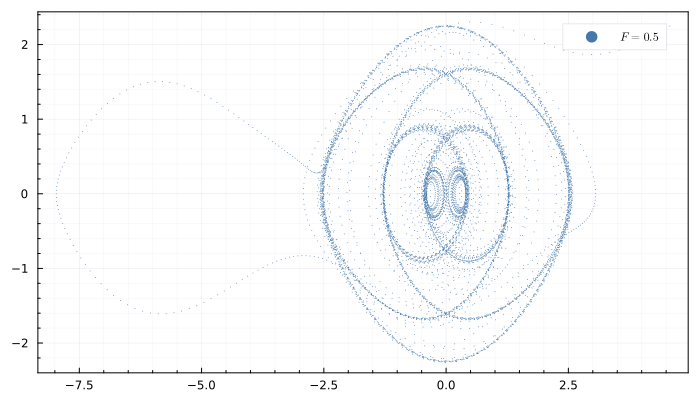

In [13]:
# phase space diagrams
ψ1, t = trajectory(forcedoscillator, 800; Δt = 0.1)
ψ2, t = trajectory(forcedoscillator2, 800; Δt = 0.1) 
ψ3, t = trajectory(forcedoscillator3, 800; Δt = 0.1)
ψ4, t = trajectory(forcedoscillator4, 800; Δt = 0.1) 
ψ5, t = trajectory(forcedoscillator5, 800; Δt = 0.1) 
ψ6, t = trajectory(forcedoscillator6, 800; Δt = 0.1) 

PS1 = scatter(ψ1[:, 1], ψ1[:, 2], lw = 0, markersize = 0.5, size = (700, 400), markerstrokewidth = 0, framestyle = :box, label = L"F = 0.05", legendposition = :topright)
PS2 = scatter(ψ2[:, 1], ψ2[:, 2], lw = 0, markersize = 0.5, size = (700, 400), markerstrokewidth = 0, framestyle = :box, label = L"F = 0.1", legendposition = :topright)
PS3 = scatter(ψ3[:, 1], ψ3[:, 2], lw = 0, markersize = 0.5, size = (700, 400), markerstrokewidth = 0, framestyle = :box, label = L"F = 0.28", legendposition = :topright)
PS4 = scatter(ψ4[:, 1], ψ4[:, 2], lw = 0, markersize = 0.5, size = (700, 400), markerstrokewidth = 0, framestyle = :box, label = L"F = 0.33", legendposition = :topright)
PS5 = scatter(ψ5[:, 1], ψ5[:, 2], lw = 0, markersize = 0.5, size = (700, 400), markerstrokewidth = 0, framestyle = :box, label = L"F = 0.34", legendposition = :topright)
PS6 = scatter(ψ6[:, 1], ψ6[:, 2], lw = 0, markersize = 0.5, size = (700, 400), markerstrokewidth = 0, framestyle = :box, label = L"F = 0.5", legendposition = :topright)

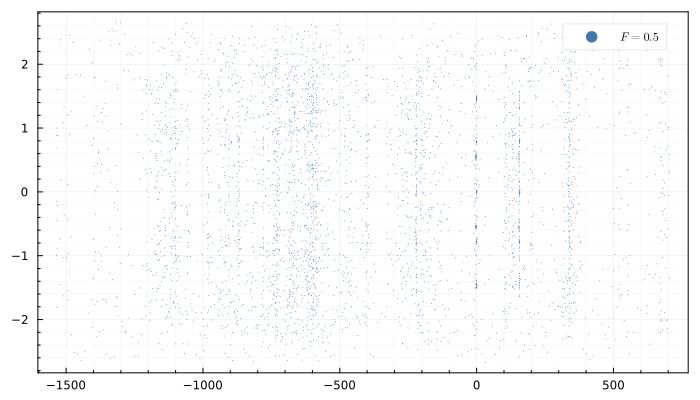

In [23]:
#Poincare maps
ψ11, t = trajectory(forcedoscillator, 25000; Δt = 2π)
ψ22, t = trajectory(forcedoscillator2, 25000; Δt = 2π) 
ψ33, t = trajectory(forcedoscillator3, 25000; Δt = 2π)
ψ44, t = trajectory(forcedoscillator4, 25000; Δt = 2π) 
ψ55, t = trajectory(forcedoscillator5, 25000; Δt = 2π) 
ψ66, t = trajectory(forcedoscillator6, 25000; Δt = 2π) 

SM1 = scatter(ψ11[:, 1], ψ11[:, 2], size = (700, 400), framestyle = :box, label = L"F = 0.05", legendposition = :topright, markersize = 0.5, markerstrokewidth = 0)
SM2 = scatter(ψ22[:, 1], ψ22[:, 2], size = (700, 400), framestyle = :box, label = L"F = 0.1", legendposition = :topright, markersize = 0.5, markerstrokewidth = 0)
SM3 = scatter(ψ33[:, 1], ψ33[:, 2], size = (700, 400), framestyle = :box, label = L"F = 0.28", legendposition = :topright, markersize = 0.5, markerstrokewidth = 0)
SM4 = scatter(ψ44[:, 1], ψ44[:, 2], size = (700, 400), framestyle = :box, label = L"F = 0.33", legendposition = :topright, markersize = 0.5, markerstrokewidth = 0)
SM5 = scatter(ψ55[:, 1], ψ55[:, 2], size = (700, 400), framestyle = :box, label = L"F = 0.34", legendposition = :topright, markersize = 0.5, markerstrokewidth = 0)
SM6 = scatter(ψ66[:, 1], ψ66[:, 2], size = (700, 400), framestyle = :box, label = L"F = 0.5", legendposition = :topright, markersize = 0.5, markerstrokewidth = 0)

In [18]:
#For proper layout
# l = @layout [
#     a{0.0001w} [[grid(2,3)] 
#     b{0.0001h}]
# ]
# C₁ = plot(Y, PS1, PS2, PS3, PS4, PS5, PS6, X, layout = l, size = (800, 300), plot_title = L"Phase space diagrams for $t = 800 \ [s]$", plot_titlefontsize = 9, 
#     tickfontsize = 5, legendfontsize = 7)

In [25]:
#For proper layout
# l = @layout [
#     a{0.0001w} [[grid(2,3)] 
#     b{0.0001h}]
# ]
# C₂ = plot(Y, SM1, SM2, SM3, SM4, SM5, SM6, X, layout = l, size = (800, 300), plot_title = L"Stroboscopic maps for $t = 25,000 \ [s]$", plot_titlefontsize = 9, 
#     tickfontsize = 5, legendfontsize = 7)

In [ ]:
#savefig(C₁, "PTPS.pdf")
#savefig(C₂, "PTSM.pdf")

### Lyapunov exponents

In [34]:
Fparam = Array{Float64}(undef, N) #for random F
Tparam = Array{Float64}(undef, N) #for variable time of evolutions
#Wparam = Array{Float64}(undef, N) #use if ω is to be randomised as well
for n in 1:N
    Fparam[n] = rand(0.001:0.001:1)
    Tparam[n] = n/10
    #Wparam[n] = rand(0.1:0.001:5)
end

In [35]:
L1 = Array{Float64}(undef, N)
L2 = Array{Float64}(undef, N)
L2 = Array{Float64}(undef, N)
L3 = Array{Float64}(undef, N)
L4 = Array{Float64}(undef, N)

T = 800 #time of evolution

for n in 1:N
    #f1 = CoupledODEs(forced_osc!, u0, [1, Fparam[n]]; diffeq)
    #L1[n] = lyapunov(f1, T, Δt = 0.01) #for L vs F
    # f2 = CoupledODEs(forced_osc!, u0, [Wparam[n], 0.1]; diffeq)
    # L2[n] = lyapunov(f2, T, Δt = 0.01) #for L vs ω
    f = CoupledODEs(forced_osc!, u0, [1, 0.4]; diffeq)
    fnew = CoupledODEs(forced_osc!, u0, [1, 0.33]; diffeq)
    L3[n] = lyapunov(f, Tparam[n], Δt = 0.01)
    L4[n] = lyapunov(fnew, Tparam[n], Δt = 0.01) #for L vs T
end

In [ ]:
#for plotting L vs ω
# A₁ = plot()
# for m in 1:N
#     scatter!((Wparam[m], L2[m]), label = :false, c = "dark blue", markersize = 1.3)
# end
# plot!(xlabel = L"\omega", size = (600, 380), titlefontsize = 9, framestyle = :box, labelfontsize = 10, tickfontsize = 5)
# A₁

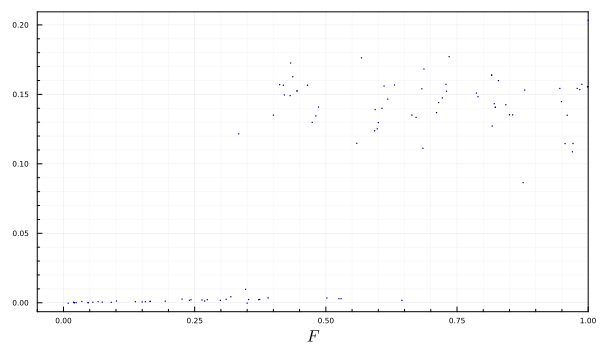

In [28]:
#for plotting L vs F
A₂ = plot()
for m in 1:N
    scatter!((Fparam[m], L1[m]), label = :false, markersize = 0.8, c = "dark blue")
end
plot!(xlabel = L"F", size = (600, 350), titlefontsize = 7, framestyle = :box, labelfontsize = 11, tickfontsize = 5, xlims = (-0.05, 1))
#plot!(plot_title = L"The maximum Lyapunov exponent for $t = 800 \ [sec]$", plot_titlefontsize = 10)#, margin = 2mm)xticks = 0:0.1:1, 
A₂

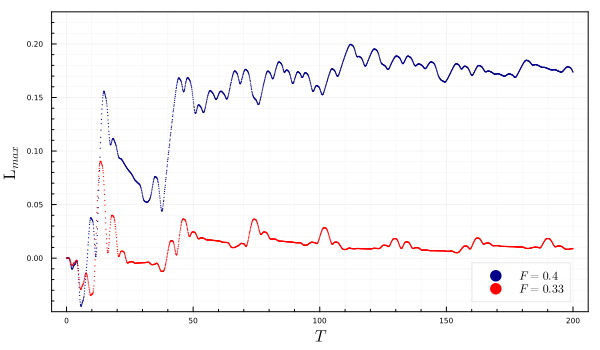

In [36]:
#for plotting L vs T
A₃ = plot()
for m in 1:N
    if m ==1
    scatter!((Tparam[m], L3[m]), label = L"F = 0.4", markersize = 0.7, c = "dark blue")
    scatter!((Tparam[m], L4[m]), label = L"F = 0.33", markersize = 0.7, c = "red")
else
    scatter!((Tparam[m], L3[m]), label = :false, markersize = 0.7, c = "dark blue")
    scatter!((Tparam[m], L4[m]), label = :false, markersize = 0.7, c = "red")
    end

end
plot!(legendposition = :bottomright)
plot!(xlabel = L"T", size = (600, 350), titlefontsize = 7, framestyle = :box, labelfontsize = 11, tickfontsize = 5, ylabel = L"\mathrm{L}_{max}", ylim = (-0.05, 0.23))
A₃

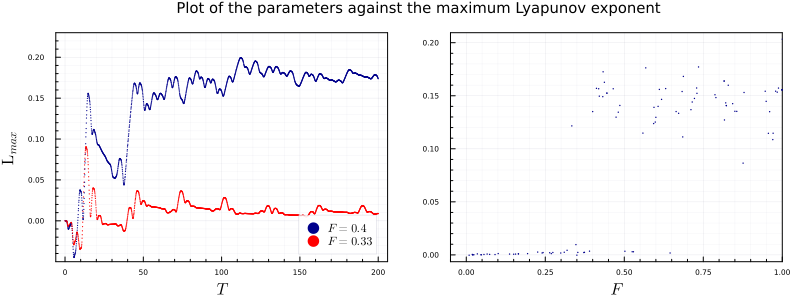

In [37]:
plot(A₃, A₂, layout = (1,2), size = (800, 300), plot_title = "Plot of the parameters against the maximum Lyapunov exponent",
     plot_titlefontsize = 10, margin = 2.5mm)

### Optional: saving data

In [ ]:
# This was used to obtain the inset figure since plotting insets in Julia is tricky. The data from above was saved into dataframes and
# written to .csv files which were used to plot the inset figure using Microsoft Excel and the inset inserted using XJournal++

In [ ]:
dF = DataFrame(Fparam', :auto)
dL = DataFrame(L1', :auto)
dFN= DataFrame([[names(dF)]; collect.(eachrow(dF))], [:column; Symbol.(axes(dF, 1))])
dLN= DataFrame([[names(dL)]; collect.(eachrow(dL))], [:column; Symbol.(axes(dL, 1))])

In [ ]:
CSV.write("Fparams.csv", dFN) #writes the F values
CSV.write("Lyapunov.csv", dLN) #writes the L values
#combine both in a new Excel sheet to plot the inset